This python script uses a convolutional neural network to classify images of faces.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy import misc, ndimage
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K

Using TensorFlow backend.


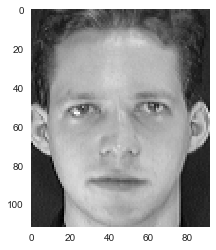

In [2]:
plt.gray()
x_0 = misc.imread('faces/s1/1.pgm', flatten=True)
plt.imshow(x_0)
plt.grid(False)
plt.show()

In [3]:
x_0.shape

(112, 92)

In [4]:
x = []
y = []

for j in range(1,11):
  for k in range(1,11):
    image_filename = 'faces/s%d/%d.pgm'%(j,k)
    image = misc.imread(image_filename, flatten=True)
    #h = 28.0/image.shape[0]
    #l = 28.0/image.shape[1]
    #image = ndimage.zoom(image,(h,l))
    x.append(image)
    y.append('%d'%(j-1))

In [5]:
x = np.array(x)
y = np.array(y)

In [6]:
x.shape

(100, 112, 92)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,stratify=y)

In [8]:
num_classes = 10
img_rows, img_cols = 112, 92
input_shape = (img_rows, img_cols, 1)

In [9]:
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_train /= 255
x_test /= 255

In [10]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential()
model.add(Conv2D(filters = 40, kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax')) #'sigmoid','relu' rectified linear unit

In [12]:
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
#loss='mean_squared_error', optimizer='sgd','adam'

In [13]:
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
80/80 [==============================] - 1s - loss: 2.6376 - acc: 0.0625     
Epoch 2/10
80/80 [==============================] - 0s - loss: 2.0617 - acc: 0.2750     
Epoch 3/10
80/80 [==============================] - 0s - loss: 1.8021 - acc: 0.4000     
Epoch 4/10
80/80 [==============================] - 0s - loss: 1.3798 - acc: 0.5875     
Epoch 5/10
80/80 [==============================] - 1s - loss: 1.0244 - acc: 0.7250     
Epoch 6/10
80/80 [==============================] - 0s - loss: 0.6040 - acc: 0.9000     
Epoch 7/10
80/80 [==============================] - 0s - loss: 0.4412 - acc: 0.9375     
Epoch 8/10
80/80 [==============================] - 0s - loss: 0.2047 - acc: 1.0000     
Epoch 9/10
80/80 [==============================] - 0s - loss: 0.1243 - acc: 1.0000     
Epoch 10/10
80/80 [==============================] - 0s - loss: 0.0882 - acc: 1.0000     


In [14]:
y_pred = model.predict(x_test, batch_size= x_test.shape[0])

In [15]:
# Reversing to_categorical
y_pred_r = np.argmax(y_pred,axis=1)
y_test_r = np.argmax(y_test,axis=1)

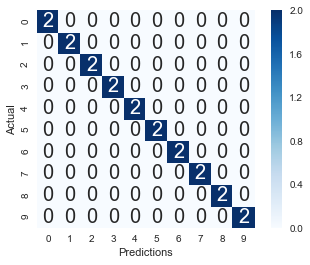

In [16]:
table = pd.crosstab(y_test_r, y_pred_r, rownames=['Actual'], colnames=['Predictions'])

sbn.heatmap(table, cbar=True, cmap='Blues',annot=True, square=True, fmt='d', annot_kws={'size': 20})

plt.show()

In [17]:
model.evaluate(x_test, y_test, verbose=0) # [loss, accuracy]

[0.11389966309070587, 1.0]